## Intro to hyperopt

In [135]:
import numpy as np
from hyperopt import hp, tpe, fmin
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd


In [ ]:
# Single line bayesian optimization of polynomial function
best = fmin(fn = lambda x: np.poly1d([1, -2, -28, 28, 12, -26, 100])(x),
            space = hp.normal('x', 4.9, 0.5), algo=tpe.suggest, 
            max_evals = 2000)

In [3]:
print(best)

{'x': 4.878111117200086}


In [5]:
hp.normal('x', 4.9, 0.5)

In [27]:
p =np.poly1d([1, -2, -28, 28, 12, -26, 100])
print(p(2))
print(p)

-128
   6     5      4      3      2
1 x - 2 x - 28 x + 28 x + 12 x - 26 x + 100


In [28]:
np.argmin(p),np.argmax(p)

(2, 6)

In [42]:
def objective(x):
    
    f = np.poly1d([1, -2, -28, 28,12, -26, 100])
    
    return f(x)*0.5

minimum x for minimum y 4.877887788778878 -2198.0119626575806


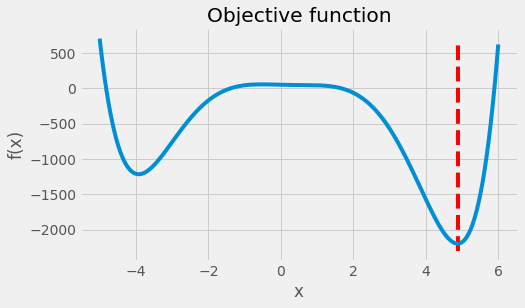

In [66]:
#Check the objective function
x = np.linspace(-5, 6, num = 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]
print("minimum x for minimum y",minx, miny)

plt.figure(figsize = (7,4))
plt.style.use('fivethirtyeight')
plt.title('Objective function');plt.xlabel('x');plt.ylabel('f(x)')
plt.plot(x, y)
plt.vlines(x = minx, ymin = miny - 100, ymax = max(y), colors = 'r', linestyles='dashed')
plt.show()



## Domain
values of x over which the function will be evaluated

In [90]:
from hyperopt import hp

space = hp.uniform('x', -5, 6)
print(space)

0 float
1   hyperopt_param
2     Literal{x}
3     uniform
4       Literal{-5}
5       Literal{6}


(Text(0.5, 0, 'x'), Text(0, 0.5, 'Frequency'))

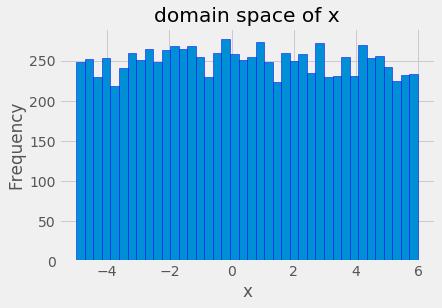

In [91]:
#Draw samples from space using hyperopt's utility
from hyperopt.pyll.stochastic import sample

samples = [sample(space) for _ in range(10000)]

plt.hist(samples, bins = 40, edgecolor = 'b')
plt.title('domain space of x');plt.xlabel('x'), plt.ylabel('Frequency')

Algorithms will start with random values from uniform distribution, and evetually sample more near the 4.9 which is minimum of function

## Hyperparameter optimization algorithm
two choices - random selection, and Tree Parzen estimator

In [110]:
from hyperopt import tpe, rand

#Create algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest
print(tpe_algo,rand_algo )

<function suggest at 0x0000023F4A3530D0> <function suggest at 0x0000023F4D3FBAE8>


## History 
using Trials object

In [111]:
from hyperopt import Trials

#Trial objects
tpe_trials = Trials()
rand_trails = Trials()

## Run optimization

In [112]:
from hyperopt import fmin

tpe_best = fmin(fn = objective, space=space, algo= tpe_algo, trials = tpe_trials, 
               max_evals = 2000,rstate = np.random.RandomState(50))
print(tpe_best)

100%|██████████████████████████████████████████████| 2000/2000 [00:22<00:00, 87.54it/s, best loss: -2198.0118811219113]
{'x': 4.878481851906148}


In [113]:
rand_best = fmin(fn = objective, space = space, algo = rand_algo,trials = rand_trails,
                max_evals = 2000, rstate = np.random.RandomState(50))
print(rand_best)

100%|█████████████████████████████████████████████| 2000/2000 [00:04<00:00, 468.50it/s, best loss: -2198.0116907646866]
{'x': 4.877613189834774}


In [114]:
##Check the trial info
tpe_trials.best_trial

{'state': 2,
 'tid': 655,
 'spec': None,
 'result': {'loss': -2198.0118811219113, 'status': 'ok'},
 'misc': {'tid': 655,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'x': [655]},
  'vals': {'x': [4.878481851906148]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2019, 3, 14, 23, 57, 47, 937000),
 'refresh_time': datetime.datetime(2019, 3, 14, 23, 57, 47, 937000)}

In [123]:
print(tpe_trials.best_trial['result'])
print(tpe_trials.best_trial['misc'])
print(tpe_trials.best_trial['misc']['idxs']['x'])

{'loss': -2198.0118811219113, 'status': 'ok'}
{'tid': 655, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [655]}, 'vals': {'x': [4.878481851906148]}}
[655]


In [116]:
rand_trails.best_trial

{'state': 2,
 'tid': 235,
 'spec': None,
 'result': {'loss': -2198.0116907646866, 'status': 'ok'},
 'misc': {'tid': 235,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'x': [235]},
  'vals': {'x': [4.877613189834774]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2019, 3, 14, 23, 58, 7, 71000),
 'refresh_time': datetime.datetime(2019, 3, 14, 23, 58, 7, 71000)}

In [121]:
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trails.best_trial['misc']['idxs']['x'][0]))


Number of trials needed to attain minimum with TPE:    655
Number of trials needed to attain minimum with random: 235


In [127]:
tpe_trials.argmin,tpe_trials.average_best_error, tpe_trials.results

({'x': 4.878481851906148},
 <bound method Trials.average_best_error of <hyperopt.base.Trials object at 0x0000023F5DEA95F8>>,
 [{'loss': 362.10073176241576, 'status': 'ok'},
  {'loss': -2023.840519083054, 'status': 'ok'},
  {'loss': -755.19448655957, 'status': 'ok'},
  {'loss': 55.43551843081939, 'status': 'ok'},
  {'loss': 350.7801062073625, 'status': 'ok'},
  {'loss': 50.27404045668717, 'status': 'ok'},
  {'loss': -52.6373804709486, 'status': 'ok'},
  {'loss': -166.61502936031033, 'status': 'ok'},
  {'loss': 44.50530115248672, 'status': 'ok'},
  {'loss': -754.575770215964, 'status': 'ok'},
  {'loss': 38.68961018103009, 'status': 'ok'},
  {'loss': -1437.0746937193205, 'status': 'ok'},
  {'loss': -1215.0391088074407, 'status': 'ok'},
  {'loss': -79.67108061388663, 'status': 'ok'},
  {'loss': -2048.1392106608305, 'status': 'ok'},
  {'loss': -7.416128835311234, 'status': 'ok'},
  {'loss': -957.9558982352156, 'status': 'ok'},
  {'loss': -878.0400327310085, 'status': 'ok'},
  {'loss': 43.86

In [140]:
tpe_results = pd.DataFrame({'iteration': tpe_trials.idxs_vals[0]['x'], 
                          
                           'x': tpe_trials.idxs_vals[1]['x'],
                           'loss':[i['loss'] for i in tpe_trials.results],})
tpe_results.tail()

,iteration,x,loss
1995,1995,5.088496,-2134.107700
1996,1996,5.710695,-842.270979
1997,1997,4.063944,-1638.857016
1998,1998,4.342800,-1916.894672
1999,1999,4.912881,-2196.416463


In [137]:
tpe_trials.results

{'loss': 362.10073176241576, 'status': 'ok'}

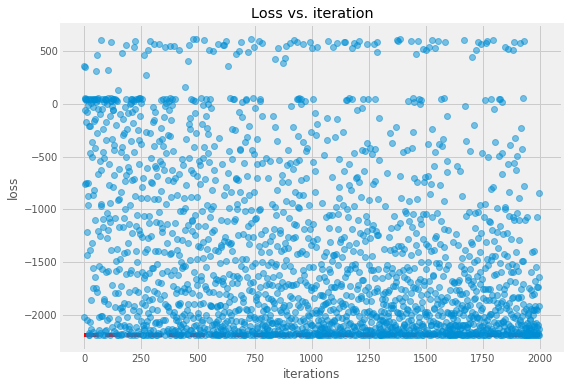

In [171]:
plt.figure(figsize = (8,6))
plt.plot(tpe_results['iteration'],tpe_results['loss'], 'o', alpha = 0.5)
plt.title('Loss vs. iteration');plt.xlabel('iterations'),plt.ylabel('loss')
plt.hlines(miny, 0, 2000, linestyle = 'dashed', color = 'red')

(Text(0.5, 0, 'x'), Text(0, 0.5, 'loss'))

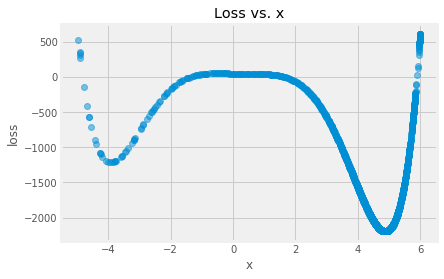

In [153]:
plt.figure(figsize = (6,4))
plt.plot(tpe_results['x'],tpe_results['loss'], 'o', alpha = 0.5)
plt.title('Loss vs. x');plt.xlabel('x'),plt.ylabel('loss')

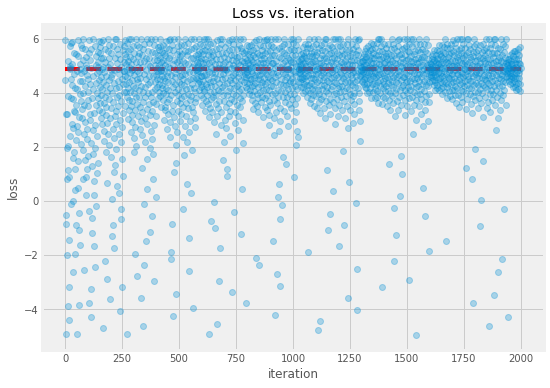

In [164]:
plt.figure(figsize = (8,6))
plt.plot(tpe_results['iteration'],tpe_results['x'], 'o', alpha = 0.3)
plt.title('Loss vs. iteration');plt.xlabel('iteration'),plt.ylabel('loss')
plt.hlines(minx, 0, 2000, linestyles='dashed', color = 'red')

## the loss is converging with 

(Text(0.5, 0, 'x'), Text(0, 0.5, 'frequency'))

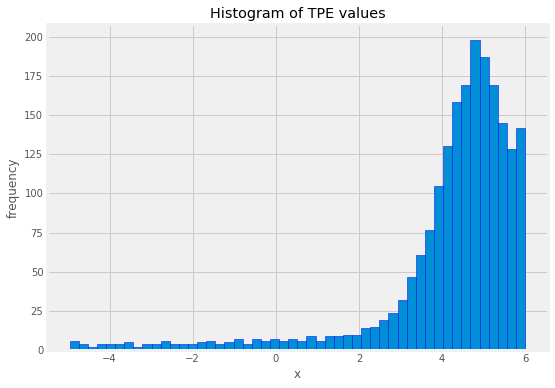

In [163]:
plt.figure(figsize = (8,6))
plt.hist(tpe_results['x'], bins = 50,edgecolor = 'b' )
plt.title('Histogram of TPE values');plt.xlabel('x'),plt.ylabel('frequency')


## we can see most values are near the actual x min

In [167]:
tpe_results.sort_values('loss', ascending = True).head()

,iteration,x,loss
655,655,4.878482,-2198.011881
1369,1369,4.877646,-2198.011733
161,161,4.879614,-2198.009188
230,230,4.875995,-2198.006119
969,969,4.880573,-2198.004295


## For random model, the selection is random

In [168]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trails.results], 'iteration': rand_trails.idxs_vals[0]['x'],
                            'x': rand_trails.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,362.100732,0,5.957885
1,-2023.840519,1,4.470885
2,-755.194487,2,3.218963
3,55.435518,3,-0.515859
4,350.780106,4,-4.916832


(Text(0.5, 0, 'iterations'), Text(0, 0.5, 'loss'))

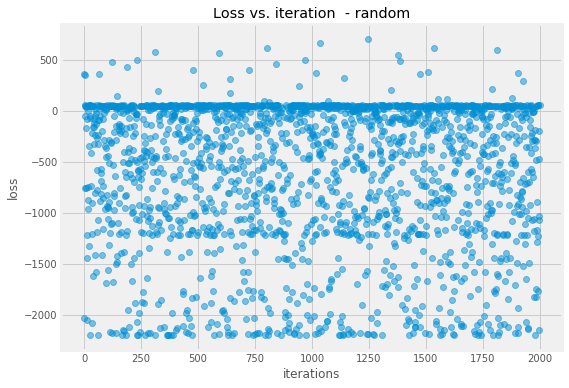

In [169]:
plt.figure(figsize = (8,6))
plt.plot(rand_results['iteration'],rand_results['loss'], 'o', alpha = 0.5)
plt.title('Loss vs. iteration  - random');plt.xlabel('iterations'),plt.ylabel('loss')

(Text(0.5, 0, 'x'), Text(0, 0.5, 'loss'))

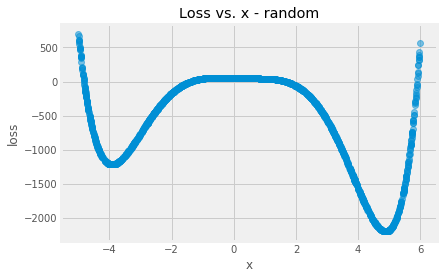

In [172]:
plt.figure(figsize = (6,4))
plt.plot(rand_results['x'],rand_results['loss'], 'o', alpha = 0.5)
plt.title('Loss vs. x - random');plt.xlabel('x'),plt.ylabel('loss')

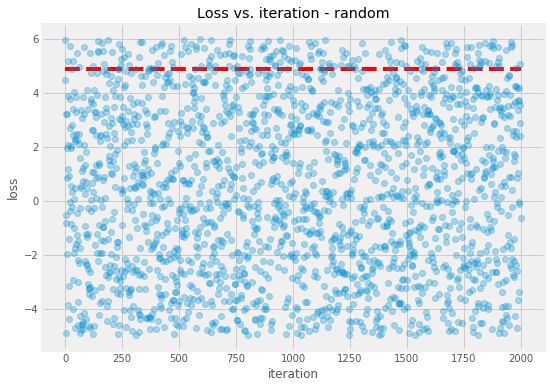

In [173]:
plt.figure(figsize = (8,6))
plt.plot(rand_results['iteration'],rand_results['x'], 'o', alpha = 0.3)
plt.title('Loss vs. iteration - random');plt.xlabel('iteration'),plt.ylabel('loss')
plt.hlines(minx, 0, 2000, linestyles='dashed', color = 'red')

## the loss is converging with 

(Text(0.5, 0, 'x'), Text(0, 0.5, 'frequency'))

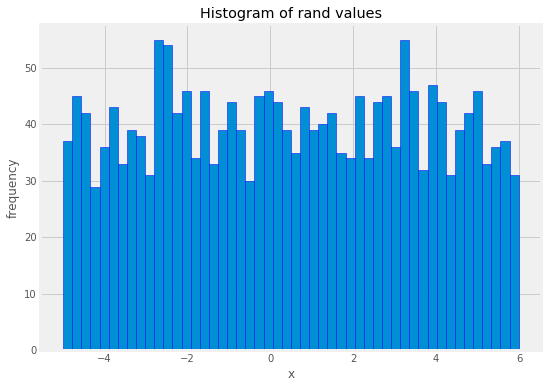

In [175]:
plt.figure(figsize = (8,6))
plt.hist(rand_results['x'], bins = 50,edgecolor = 'b' )
plt.title('Histogram of rand values');plt.xlabel('x'),plt.ylabel('frequency')


## we can see most values are random

## Slightly Advanced features

* Smarter domain space over which to search
* Return more useful information from the objective function

(array([   4.,    4.,   20.,   51.,  141.,  289.,  500.,  779., 1098.,
        1285., 1477., 1326., 1059.,  853.,  496.,  335.,  167.,   78.,
          32.,    6.]),
 array([1.1781586 , 1.52906905, 1.8799795 , 2.23088995, 2.5818004 ,
        2.93271085, 3.2836213 , 3.63453175, 3.9854422 , 4.33635265,
        4.6872631 , 5.03817355, 5.389084  , 5.73999445, 6.0909049 ,
        6.44181535, 6.7927258 , 7.14363625, 7.4945467 , 7.84545715,
        8.1963676 ]),
 <a list of 20 Patch objects>)

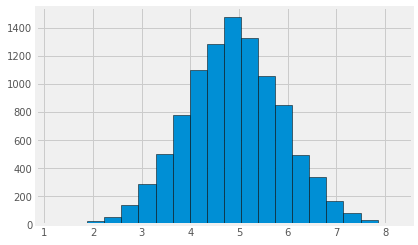

In [197]:
# select a differnt distributoin of domain space based on knowledge

space = hp.normal('x', 4.9, 1)

samples = [sample(space) for _ in range(10000)]

plt.figure(figsize = (6,4))
plt.hist(samples, bins = 20,edgecolor = 'black')

## More useful trial object

by returning more useful values from the objective function

In [205]:
from hyperopt import STATUS_OK
import time

In [206]:
def objective(x):
    
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    
    start = time.time()
    loss = f(x)*0.5
    end = time.time()
    
    time_elapsed = end - start
    
    result = {'loss':loss, 'status':STATUS_OK, 'x':x, 'time':time_elapsed}
    
    return result

In [207]:
tpe_algo = tpe.suggest

In [224]:
## Run the algorithm again with new trials

trials = Trials()

best = fmin(fn = objective, space = space, algo = tpe_algo, trials = trials, 
           max_evals = 2000, rstate = np.random.RandomState(200))

100%|██████████████████████████████████████████████| 2000/2000 [00:11<00:00, 176.08it/s, best loss: -2198.012037930954]


In [225]:
results = trials.results

In [226]:
results[:2]

[{'loss': -538.372235274416,
  'status': 'ok',
  'x': 5.783581351907089,
  'time': 0.0},
 {'loss': 5132.132199823597,
  'status': 'ok',
  'x': 6.496160825937241,
  'time': 0.0}]

In [227]:
results_df = pd.DataFrame({'x': [i['x'] for i in results],
                         'time':[i['time'] for i in results],
                         'loss':[i['loss'] for i in results],
                         'iteration':list(range(len(results)))}
                         )

results_df.sort_values('loss').head()

,x,time,loss,iteration
1786,4.878172,0.0,-2198.012038,1786
706,4.877992,0.0,-2198.012015,706
1467,4.878325,0.0,-2198.011992,1467
639,4.878340,0.0,-2198.011984,639
522,4.877923,0.0,-2198.011983,522


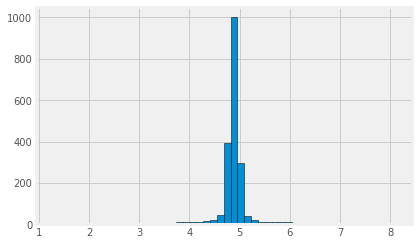

In [230]:
results_df.x.hist(bins = 50, edgecolor = 'black')

## Using Hyperopt on lgbm

In [ ]:
import lightgbm as lgb